# Combining Everything Together

This file will perform binary classification on the iris dataset. We will only predict if a flower is I.setosa or not. 

We will create a simple binary classifier by creating a line and running everything through a sigmoid to get a binary predictor. The two features we will use are pedal length and pedal width.  We use these two features because we know that Iris setosa is separable by these two features.  We aim to find the line that separates it out.

We will use batch training, but this can be easily adapted to stochastic training (i.e. set batch size equal to 1).

We start by loading the necessary libraries and resetting the computational graph.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

### Load Iris Data

We load the data and mark the target if it is I. setosa or not.  The input data will be the 3rd and 4th features of the data set. (Petal Length and Petal Width).

In [2]:
# Load the iris data
# iris.target = {0, 1, 2}, where '0' is setosa
# iris.data ~ [sepal.width, sepal.length, pedal.width, pedal.length]
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

We set the batch size to 20.

In [7]:
batch_size = 20

Then we start a computational graph session.

In [8]:
# Create graph
sess = tf.Session()

### Placeholders

We declare the placeholders for the model.  Just to illustrate that we can feed in multiple x-features separately, we create two separate placeholders for the two Iris features.

In [9]:
# Declare placeholders
x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

### Model Variables

We are going to be doing a linear model, so we will need to create two variables, `A` (slope) and `b` (intercept).

In [10]:
# Create variables A and b
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

### Model Operations

A line can be defined as $x_{1}=A\cdot x_{2} + b$. To create a linear separator, we would like to see which side of the line the data points fall. There are three cases:

- A point exactly on the line will satisfy: $0 = x_{1} - (A\cdot x_{2} + b)$
- A point above the line satisfies: $0 > x_{1} - (A\cdot x_{2} + b)$
- A point below the line satisfies: $0 < x_{1} - (A\cdot x_{2} + b)$

We will make the output of this model:

$$x_{1} - (A \cdot x_{2} + b)$$

Then the predictions will be the sign of that output:

$$Prediction(x_{1},x_{2}) = sign(x_{1} - (A \cdot x_{2} + b))$$

So we add the corresponding operations to the computational graph.

In [12]:
# Add model to graph:
# x1 - A*x2 + b
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)

### Loss Function

Since we are doing a categorical prediction (I.setosa or not), we will use the sigmoid cross entropy loss.  This is a function provided to us by TensorFlow.

In [14]:
# Add classification loss (cross entropy)
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)

### Optimizing Function and Variable Initialization

We use the standard Gradient Descent Optimization function with a learning rate of `0.05`.  We then add and run a variable initialization operation.

In [15]:
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

### Run Classification

We run the classification for 1000 iterations and output the values of `A`, `b`, and loss every 200 iterations.

In [16]:
# Run Loop
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    #rand_x = np.transpose([iris_2d[rand_index]])
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    #rand_y = np.transpose([binary_target[rand_index]])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

Step #200 A = [[ 8.55510139]], b = [[-3.40820074]]
Step #400 A = [[ 10.06343651]], b = [[-4.7072382]]
Step #600 A = [[ 11.06942081]], b = [[-5.42431259]]
Step #800 A = [[ 11.76633072]], b = [[-5.98747921]]
Step #1000 A = [[ 12.37225819]], b = [[-6.37318277]]


### Visualize Results

We pull out the slope and intercept and plot the predictions

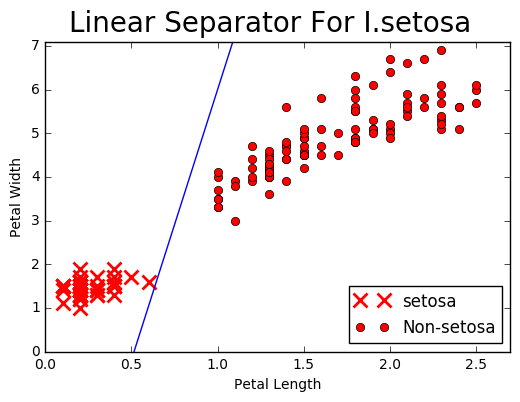

In [31]:
# Pull out slope/intercept
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)

# Create fitted line
x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
  ablineValues.append(slope*i+intercept)

# Plot the fitted line over the data
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()